<a href="https://colab.research.google.com/github/SubramaniMokkala/AI-Storyteller/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: google drive connection code

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 1: Data Loading

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the sampled dataset
file_path = "/content/drive/MyDrive/PBA Batch - 14/dataset/sampled_reviews.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(df.head())

       Id   ProductId          UserId             ProfileName  \
0  165257  B000EVG8J2  A1L01D2BD3RKVO  B. Miller "pet person"   
1  231466  B0000BXJIS  A3U62RE5XZDP0G                   Marty   
2  427828  B008FHUFAU   AOXC0JQQZGGB6         Kenneth Shevlin   
3  433955  B006BXV14E  A3PWPNZVMNX3PA             rareoopdvds   
4   70261  B007I7Z3Z0  A1XNZ7PCE45KK7                  Og8ys1   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     0                       0      5  1268179200   
1                     0                       0      5  1298937600   
2                     0                       2      3  1224028800   
3                     0                       1      2  1335312000   
4                     0                       2      5  1334707200   

                                        Summary  \
0  Crunchy & Good Gluten-Free Sandwich Cookies!   
1                            great kitty treats   
2                                  

# Step 2: Data Exploration

In [ ]:
# Display basic information about the dataset to understand its structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      10000 non-null  int64 
 1   ProductId               10000 non-null  object
 2   UserId                  10000 non-null  object
 3   ProfileName             10000 non-null  object
 4   HelpfulnessNumerator    10000 non-null  int64 
 5   HelpfulnessDenominator  10000 non-null  int64 
 6   Score                   10000 non-null  int64 
 7   Time                    10000 non-null  int64 
 8   Summary                 9999 non-null   object
 9   Text                    10000 non-null  object
dtypes: int64(5), object(5)
memory usage: 781.4+ KB
None


In [ ]:
# Show the first few rows of the dataset to get an overview
print(df.head())

       Id   ProductId          UserId             ProfileName  \
0  165257  B000EVG8J2  A1L01D2BD3RKVO  B. Miller "pet person"   
1  231466  B0000BXJIS  A3U62RE5XZDP0G                   Marty   
2  427828  B008FHUFAU   AOXC0JQQZGGB6         Kenneth Shevlin   
3  433955  B006BXV14E  A3PWPNZVMNX3PA             rareoopdvds   
4   70261  B007I7Z3Z0  A1XNZ7PCE45KK7                  Og8ys1   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     0                       0      5  1268179200   
1                     0                       0      5  1298937600   
2                     0                       2      3  1224028800   
3                     0                       1      2  1335312000   
4                     0                       2      5  1334707200   

                                        Summary  \
0  Crunchy & Good Gluten-Free Sandwich Cookies!   
1                            great kitty treats   
2                                  

In [ ]:
# Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   1
Text                      0
dtype: int64


In [ ]:
# Get the distribution of the 'Score' column to see the ratings distribution
print("Distribution of the 'Score' column:")
print(df['Score'].value_counts())

Distribution of the 'Score' column:
Score
5    6397
4    1455
1     891
3     750
2     507
Name: count, dtype: int64


# Step 3: Data Pre-Processing

In [ ]:
# Drop rows where 'Text' is missing as it's crucial for sentiment analysis
df = df.dropna(subset=['Text'])

In [ ]:
# For 'Summary', we can fill missing values with an empty string
df['Summary'] = df['Summary'].fillna('')

In [ ]:
print("Missing values handled. Remaining rows:", len(df))

Missing values handled. Remaining rows: 10000


In [ ]:
import re

# Function to clean text: lowercasing, removing special characters, and extra spaces
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

In [ ]:
# Apply the cleaning function to the 'Text' and 'Summary' columns
df['cleaned_text'] = df['Text'].apply(clean_text)
df['cleaned_summary'] = df['Summary'].apply(clean_text)

In [ ]:
# Display a few cleaned texts to verify
print(df[['cleaned_text', 'cleaned_summary']].head())

                                        cleaned_text  \
0  having tried a couple of other brands of glute...   
1  my cat loves these treats if ever i cant find ...   
2  a little less than i expected it tends to have...   
3  first there was frosted miniwheats in original...   
4  and i want to congratulate the graphic artist ...   

                            cleaned_summary  
0  crunchy good glutenfree sandwich cookies  
1                        great kitty treats  
2                              coffee taste  
3            so the miniwheats were too big  
4                              great taste   


In [ ]:
# Map ratings to sentiment categories
def map_sentiment(score):
    if score == 5:
        return 'very positive'
    elif score == 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    elif score == 2:
        return 'negative'
    else:
        return 'very negative'

In [ ]:
# Create a new column for sentiment
df['sentiment'] = df['Score'].apply(map_sentiment)

In [ ]:
# Display a few rows to verify the sentiment mapping
print(df[['Score', 'sentiment']].head())

   Score      sentiment
0      5  very positive
1      5  very positive
2      3        neutral
3      2       negative
4      5  very positive


# Step 4: Using a Pre-Trained Sentiment Model

In [ ]:
# Install the transformers library if not already installed
!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
# Initialize the sentiment-analysis pipeline using a pre-trained model
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# Define a function to map BERT's output to our custom sentiment categories
def map_bert_sentiment(text):
    result = classifier(text[:512])[0]  # Get the sentiment and score
    label = result['label']
    score = result['score']

    # Map to our five categories based on label and score
    if label == 'POSITIVE':
        if score > 0.8:
            return 'very positive'
        else:
            return 'positive'
    elif label == 'NEGATIVE':
        if score > 0.8:
            return 'very negative'
        else:
            return 'negative'
    else:
        return 'neutral'  # This is an optional handling if needed

In [ ]:
# Apply the function to each cleaned text
df['bert_sentiment'] = df['cleaned_text'].apply(map_bert_sentiment)

In [ ]:
# Display a few rows to verify the output
print(df[['cleaned_text', 'sentiment', 'bert_sentiment']].head())

                                        cleaned_text      sentiment  \
0  having tried a couple of other brands of glute...  very positive   
1  my cat loves these treats if ever i cant find ...  very positive   
2  a little less than i expected it tends to have...        neutral   
3  first there was frosted miniwheats in original...       negative   
4  and i want to congratulate the graphic artist ...  very positive   

  bert_sentiment  
0  very positive  
1  very positive  
2  very negative  
3  very negative  
4  very positive  


In [ ]:
# Get the distribution of the 'sentiment' column to see the ratings distribution
print("Distribution of the 'Sentimenr' column:")
print(df['sentiment'].value_counts())

Distribution of the 'Sentimenr' column:
sentiment
very positive    6397
positive         1455
very negative     891
neutral           750
negative          507
Name: count, dtype: int64


In [ ]:
# Get the distribution of the 'bert_sentiment' column to see the ratings distribution
print("Distribution of the 'bert_sentiment' column:")
print(df['bert_sentiment'].value_counts())

Distribution of the 'bert_sentiment' column:
bert_sentiment
very positive    5769
very negative    3615
positive          316
negative          300
Name: count, dtype: int64


# Step 4: Evaluation of Sentiment Labels

In [ ]:
# Check the distribution of sentiments in the dataset
sentiment_counts = df['bert_sentiment'].value_counts()
print("Distribution of Sentiments:\n", sentiment_counts)

Distribution of Sentiments:
 bert_sentiment
very positive    5769
very negative    3615
positive          316
negative          300
Name: count, dtype: int64


In [ ]:
# Visualize the sentiment distribution with a bar plot (optional)
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-28-da595d2f3757>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


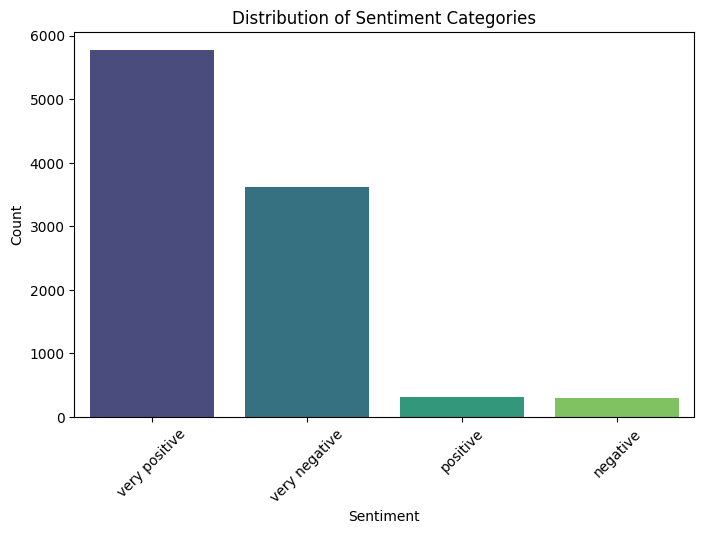

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Compare existing sentiment labels (if available) with BERT's sentiment labels
comparison_df = df[['sentiment', 'bert_sentiment']].dropna()
print(comparison_df.head(10))

       sentiment bert_sentiment
0  very positive  very positive
1  very positive  very positive
2        neutral  very negative
3       negative  very negative
4  very positive  very positive
5       positive  very positive
6  very positive  very positive
7  very positive  very positive
8       positive  very negative
9  very positive  very negative


In [ ]:
# Display the count of matches and mismatches between the two sentiment columns
matches = (comparison_df['sentiment'] == comparison_df['bert_sentiment']).sum()
total = len(comparison_df)
print(f"Number of matches: {matches}/{total}")
print(f"Percentage of matches: {matches/total * 100:.2f}%")

Number of matches: 5577/10000
Percentage of matches: 55.77%


In [ ]:
# Display some sample reviews along with their assigned sentiments
print(df[['cleaned_text', 'bert_sentiment']].sample(5))

                                           cleaned_text bert_sentiment
2765  i was planning to buy mrs mays almonds and cas...  very negative
6978  this jerky is quite pricey for a ounce bag but...  very negative
9695  im very happy with this tea the flavor is smoo...  very positive
2916  this box of pomegranate blueberry pistachio an...  very positive
8021  ive used this sauce for years and its the best...  very negative


# Step 5: Review and Fine-Tuning

In [ ]:
# Refined function to classify sentiments using score thresholds
def map_bert_sentiment_with_thresholds(result):
    label = result['label']
    score = result['score']
    if label == 'POSITIVE':
        if score > 0.85:
            return 'very positive'
        else:
            return 'positive'
    elif label == 'NEGATIVE':
        if score > 0.85:
            return 'very negative'
        else:
            return 'negative'
    else:
        return 'neutral'  # For models that might return 'neutral'

# Reapply the refined function on the cleaned text using BERT
"""df['bert_sentiment'] = classifier(df['cleaned_text'].tolist())
df['bert_sentiment'] = df['bert_sentiment'].apply(map_bert_sentiment_with_thresholds)"""


"df['bert_sentiment'] = classifier(df['cleaned_text'].tolist())\ndf['bert_sentiment'] = df['bert_sentiment'].apply(map_bert_sentiment_with_thresholds)"

In [ ]:
# Check some new samples after refining
print(df[['cleaned_text', 'bert_sentiment']].sample(5))